In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import scipy.io as sci
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from pathlib import Path
import pandas as pd
import numpy as np
import tensorflow as tf
import os
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [2]:
#check the tensorflow and keras version
print(f"Tensorflow Version: {tf.__version__}")
print(f"Keras Version: {tf.keras.__version__}")

Tensorflow Version: 2.3.1
Keras Version: 2.4.0


In [3]:
# load data
NumberData = loadmat("NumberRecognitionBigger.mat")

#extract images and label from dictionary
images = NumberData['X']
label = NumberData['y']

images = np.transpose(images)
images = images.reshape(images.shape[0], 28, 28)

label = np.transpose(label)
print(f"shape of images is: {images.shape} \nshape of label is: {label.shape}")



shape of images is: (30000, 28, 28) 
shape of label is: (30000, 1)


In [4]:
# create training, validation, testing sets and scale them

X_train_all, X_test, y_train_all, y_test = train_test_split(images, label, test_size=0.20)

X_val, X_train = X_train_all[:5000] / 255.0, X_train_all[5000:] / 255.0
y_val, y_train = y_train_all[:5000], y_train_all[5000:]
X_test = X_test/255


#no scaling
# X_val, X_train = X_train_all[:5000], X_train_all[5000:]
# y_val, y_train = y_train_all[:5000], y_train_all[5000:]

print(f"shape of X_train is: {X_train.shape} \nshape of y_train is: {y_train.shape} \nshape of X_test is: {X_test.shape} \nshape of X_test is: {y_test.shape} \nshape of X_val is: {X_val.shape} \nshape of y_val is: {y_val.shape}")



shape of X_train is: (19000, 28, 28) 
shape of y_train is: (19000, 1) 
shape of X_test is: (6000, 28, 28) 
shape of X_test is: (6000, 1) 
shape of X_val is: (5000, 28, 28) 
shape of y_val is: (5000, 1)


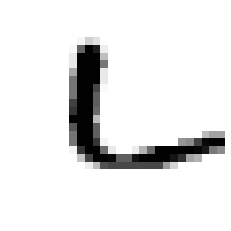

[7]


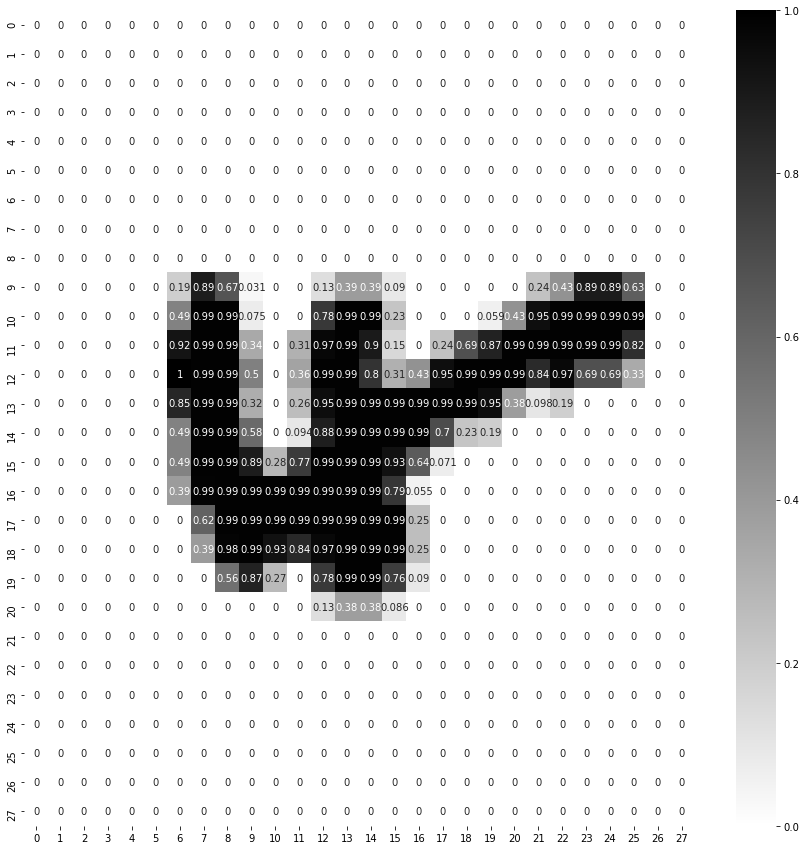

In [5]:
# lets view the first data point of X_train
plt.imshow(X_train[5000], cmap="binary")
plt.axis('off')
plt.show()
plt.figure(figsize=(15,15))
sbn.heatmap(X_train[9000], annot=True, cmap="binary")
print(y_train[5000])

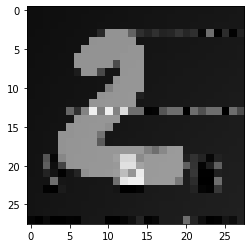

(1, 28, 28)

In [6]:
#try to get new data to test

import cv2
import matplotlib.image as mpimg



def rgb2gray(rgb):
    return np.dot(rgb[...,:3],[0.2989, 0.5870, 0.1140])

                  
# img = mpimg.imread("seven.png")
img = mpimg.imread("two.png")
im = cv2.resize(img, (28,28))
gray = rgb2gray(im)
plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.show()

gray = gray.reshape(1,28,28)
gray = gray / 255.0
gray.shape


In [7]:
LAYERS = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer3"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer4"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer5"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer6"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

model_clf = tf.keras.models.Sequential(LAYERS)

In [8]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputLayer (Flatten)         (None, 784)               0         
_________________________________________________________________
hiddenLayer1 (Dense)         (None, 300)               235500    
_________________________________________________________________
hiddenLayer2 (Dense)         (None, 100)               30100     
_________________________________________________________________
hiddenLayer3 (Dense)         (None, 300)               30300     
_________________________________________________________________
hiddenLayer4 (Dense)         (None, 100)               30100     
_________________________________________________________________
hiddenLayer5 (Dense)         (None, 300)               30300     
_________________________________________________________________
hiddenLayer6 (Dense)         (None, 100)               3

In [9]:
# check weights and bias of the hidden layer
dense_layer_hidden = model_clf.layers[1]
weights, bias = dense_layer_hidden.get_weights()
# initial weights are random and bias is set to 0 initially

In [10]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "adam" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_clf.compile(loss=tf.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(0.02),
              metrics=METRICS)

In [11]:
EPOCHS = 20
VALIDATION_SET = (X_val, y_val)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET)


Epoch 1/20
594/594 [==============================] - 1s 2ms/step - loss: 1.1640 - accuracy: 0.6423 - val_loss: 0.4848 - val_accuracy: 0.8466
Epoch 2/20
594/594 [==============================] - 1s 2ms/step - loss: 0.3296 - accuracy: 0.8991 - val_loss: 0.2823 - val_accuracy: 0.9188
Epoch 3/20
594/594 [==============================] - 1s 2ms/step - loss: 0.2272 - accuracy: 0.9312 - val_loss: 0.2658 - val_accuracy: 0.9186
Epoch 4/20
594/594 [==============================] - 1s 2ms/step - loss: 0.1734 - accuracy: 0.9468 - val_loss: 0.2096 - val_accuracy: 0.9384
Epoch 5/20
594/594 [==============================] - 1s 2ms/step - loss: 0.1371 - accuracy: 0.9586 - val_loss: 0.1933 - val_accuracy: 0.9462
Epoch 6/20
594/594 [==============================] - 1s 2ms/step - loss: 0.1080 - accuracy: 0.9674 - val_loss: 0.1680 - val_accuracy: 0.9516
Epoch 7/20
594/594 [==============================] - 1s 2ms/step - loss: 0.0875 - accuracy: 0.9745 - val_loss: 0.1537 - val_accuracy: 0.9534
Epoch 

In [12]:
#save model
import time
import os

def save_Model_path(model_dir="SAVED_MODELS"):
    os.makedirs(model_dir, exist_ok=True)
    fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")    
    model_path = os.path.join(model_dir, fileName)
    print(f"Model save at\n{model_path}")
    return model_path


In [13]:
path = model_clf.save(save_Model_path())

Model save at
SAVED_MODELS/Model_2021_01_08_01_10_15_.h5


In [14]:
history_params = pd.DataFrame(history.history)
history_params

,loss,accuracy,val_loss,val_accuracy
0,1.163971,0.642316,0.484821,0.8466
1,0.329609,0.899105,0.282305,0.9188
2,0.227192,0.931211,0.265805,0.9186
3,0.173390,0.946842,0.209642,0.9384
4,0.137135,0.958579,0.193265,0.9462
5,0.108024,0.967421,0.168013,0.9516
6,0.087452,0.974526,0.153719,0.9534
7,0.071107,0.979105,0.172416,0.9502
8,0.057245,0.984158,0.155978,0.9568
9,0.047822,0.986316,0.156763,0.9542


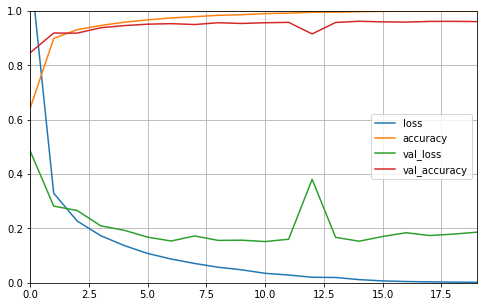

In [15]:
history_params.plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [16]:
model_clf.evaluate(X_test,y_test)

188/188 [==============================] - 0s 911us/step - loss: 0.1423 - accuracy: 0.9682


[0.14225010573863983, 0.9681666493415833]

In [17]:
# test data

# X_new = X_test[:10]
# y_proba = model_clf.predict(X_new)
# y_proba.round(2)


In [18]:
#test new data

X_new = X_test[:1]
y_proba = model_clf.predict(X_new)
y_proba.round(2)
X_new.shape

(1, 28, 28)

In [23]:
# y_pred = np.argmax(model_clf.predict(X_new), axis=-1)

y_pred = np.argmax(model_clf.predict(gray), axis=-1)
y_pred
y_test.shape

(6000, 1)

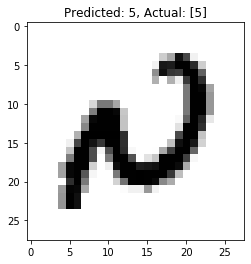

****************************************


In [20]:
y_test_new = y_test[:10]
for data, pred, actual in zip(X_new, y_pred, y_test_new):
    plt.imshow(data, cmap="binary")
    plt.title(f"Predicted: {pred}, Actual: {actual}")
    plt.show()
    print("****"*10)